In [1]:
from tensorflow.keras import layers, models, Input, regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the data
X_train = pd.read_csv('./data/X_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
y_train = pd.read_csv('./data/y_train.csv')
y_test = pd.read_csv('./data/y_test.csv')

In [3]:
def scatter_plot(y_pred, y_true):
    """Scatter plot of the predictions vs true values."""
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred, label='Predictions')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Predictions')
    plt.title('Predictions vs True Values')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.legend()
    plt.grid()
    plt.show()

## Dropout

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


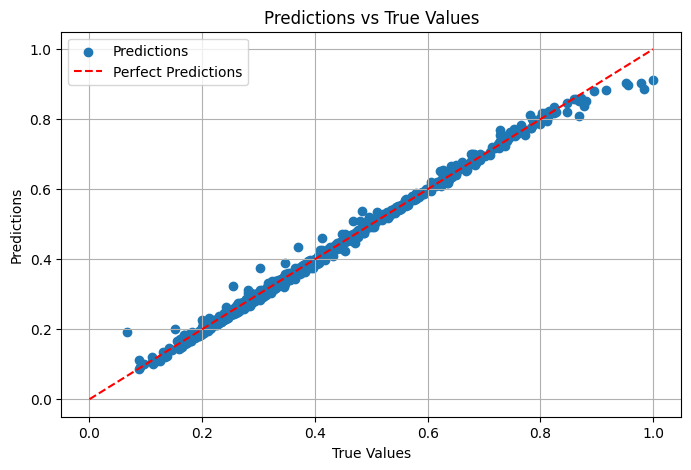

Mean Squared Error: 0.0001703662337052605
Mean Absolute Error: 0.008152794860360591
Mean Absolute Percentage Error: 2.5423%


In [4]:
# Create the neural network model
model = models.Sequential([
    Input(shape=(X_train.shape[1],)), 
    layers.Dense(128, activation='tanh'),
    layers.Dropout(0.15),	
    layers.Dense(64, activation='tanh'),
    layers.Dropout(0.1),
    layers.Dense(32, activation='tanh'),
    layers.Dropout(0.1),
    layers.Dense(1)])

#optimizer = SGD(learning_rate=0.026, momentum=0.84)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

# Train the model
history = model.fit(X_train, y_train, epochs=190, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions and plot them
predictions = model.predict(X_test)
scatter_plot(predictions, y_test)

test_mse = mean_squared_error(y_test, predictions)
test_mae = mean_absolute_error(y_test, predictions)
test_mape = mean_absolute_percentage_error(y_test, predictions)


print("===========================================================")
print(f'Mean Squared Error: {test_mse}')
print(f'Mean Absolute Error: {test_mae}')
print(f'Mean Absolute Percentage Error: {test_mape * 100:.4f}%')
print("===========================================================")

## Early Stopping

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


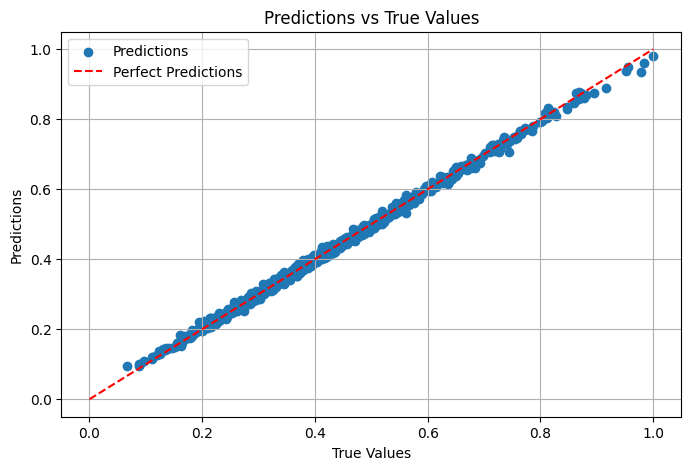

Mean Squared Error: 7.167588867814197e-05
Mean Absolute Error: 0.006679947156955069
Mean Absolute Percentage Error: 1.8926%


In [ ]:
# Create the neural network model
model = models.Sequential([
    Input(shape=(X_train.shape[1],)), 
    layers.Dense(128, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1)])

#optimizer = SGD(learning_rate=0.026, momentum=0.84)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

# Train the model with EarlyStopping
history = model.fit(X_train, y_train, epochs=190, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping], verbose=0)

# Make predictions and plot them
predictions = model.predict(X_test)
scatter_plot(predictions, y_test)

test_mse = mean_squared_error(y_test, predictions)
test_mae = mean_absolute_error(y_test, predictions)
test_mape = mean_absolute_percentage_error(y_test, predictions)


print("===========================================================")
print(f'Mean Squared Error: {test_mse}')
print(f'Mean Absolute Error: {test_mae}')
print(f'Mean Absolute Percentage Error: {test_mape * 100:.4f}%')
print("===========================================================")


## Both Techinques

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


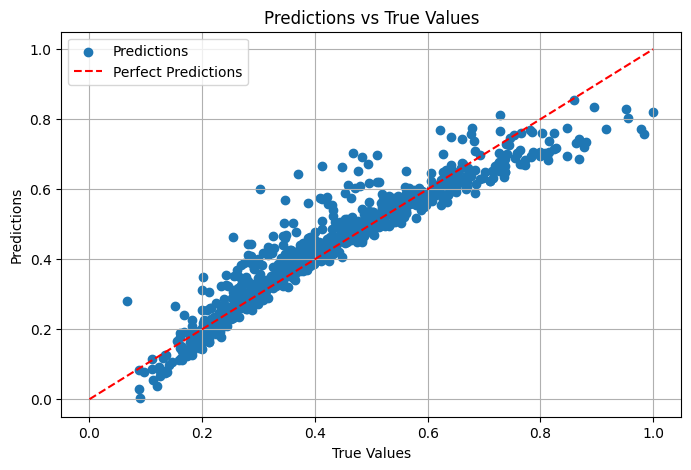

Mean Squared Error: 0.0032068039172013963
Mean Absolute Error: 0.037834533346893635
Mean Absolute Percentage Error: 10.7418%


In [6]:
# Create the neural network model
model = models.Sequential([
    Input(shape=(X_train.shape[1],)), 
    layers.Dense(128, activation='tanh'),
    layers.Dropout(0.15),
    layers.Dense(64, activation='tanh'),
    layers.Dropout(0.1),
    layers.Dense(32, activation='tanh'),
    layers.Dropout(0.1),
    layers.Dense(1)])

#optimizer = SGD(learning_rate=0.026, momentum=0.84)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

# Train the model with EarlyStopping
history = model.fit(X_train, y_train, epochs=190, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping], verbose=0)

# Make predictions and plot them
predictions = model.predict(X_test)
scatter_plot(predictions, y_test)

test_mse = mean_squared_error(y_test, predictions)
test_mae = mean_absolute_error(y_test, predictions)
test_mape = mean_absolute_percentage_error(y_test, predictions)


print("===========================================================")
print(f'Mean Squared Error: {test_mse}')
print(f'Mean Absolute Error: {test_mae}')
print(f'Mean Absolute Percentage Error: {test_mape * 100:.4f}%')
print("===========================================================")